# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [135]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [136]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [137]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [138]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [139]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [122]:
#  4. Get the average fare per ride for each city type. 
average_fare = total_fares / total_rides
average_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [123]:
# 5. Get the average fare per driver for each city type. 
average_driver_fare = total_fares / total_drivers
average_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [124]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
            "Total Rides" : total_rides,
            "Total Drivers" : total_drivers,
            "Total Fares" : total_fares,
            "Average Fare per Ride" : average_fare,
            "Average Fare per Driver" : average_driver_fare})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [125]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [126]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:.0f}".format)

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:.0f}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [140]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [147]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

new_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
new_df.head(10)

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
       1/18/2019 0:46     15.12
       1/18/2019 7:36     43.57
       1/19/2019 11:40    49.44
       1/19/2019 12:38    38.68
       1/19/2019 20:21    56.78
Name: fare, dtype: float64

In [143]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
new_df = new_df.reset_index()
new_df

,index,type,date,fare
0,0,Rural,1/1/2019 9:45,43.69
1,1,Rural,1/11/2019 4:39,16.42
2,2,Rural,1/14/2019 15:58,54.10
3,3,Rural,1/14/2019 7:09,18.05
4,4,Rural,1/15/2019 21:44,30.26
...,...,...,...,...
2359,2359,Urban,5/8/2019 1:54,32.69
2360,2360,Urban,5/8/2019 2:31,41.33
2361,2361,Urban,5/8/2019 4:20,21.99
2362,2362,Urban,5/8/2019 4:39,18.45


In [144]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.... index date / column country
pyber_pivot = new_df.pivot(index = "date", columns = "type", values = "fare")
pyber_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [148]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

date_df = pyber_pivot.loc["2019-01-01":"2019-04-29", :]

date_df.head(10)

type,Rural,Suburban,Urban
date,,,


In [112]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

date_df = pd.to_datetime(date_df.index)

In [150]:
# 7. Check that the datatype for the index is datetime using df.info()

date_df.info

<bound method DataFrame.info of Empty DataFrame
Columns: [Rural, Suburban, Urban]
Index: []>

In [151]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_df = date_df.resample('W').sum()
date_df.head(10)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

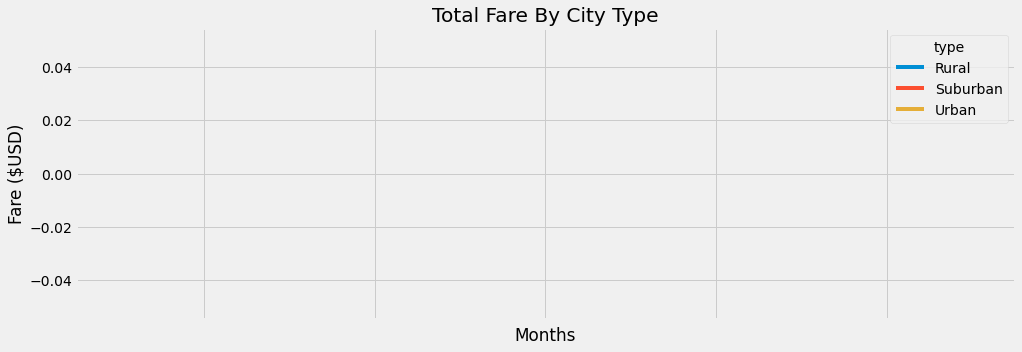

In [152]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



date_df.plot(figsize = (15,5))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title("Total Fare By City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("Months")

plt.savefig("resources/PyBer_fare_summary.png",dpi= 300, bbox_inches='tight')